# Bioconversion GUI using Widgets

The first step is to select "Cell" > "Run All" from the toolbar.  This will initialize all the widgets and allow you to interact with the unit operation options via the GUI controls.

It looks like you're running this notebook on a laptop.
Operations requiring HPC resources will be disabled.


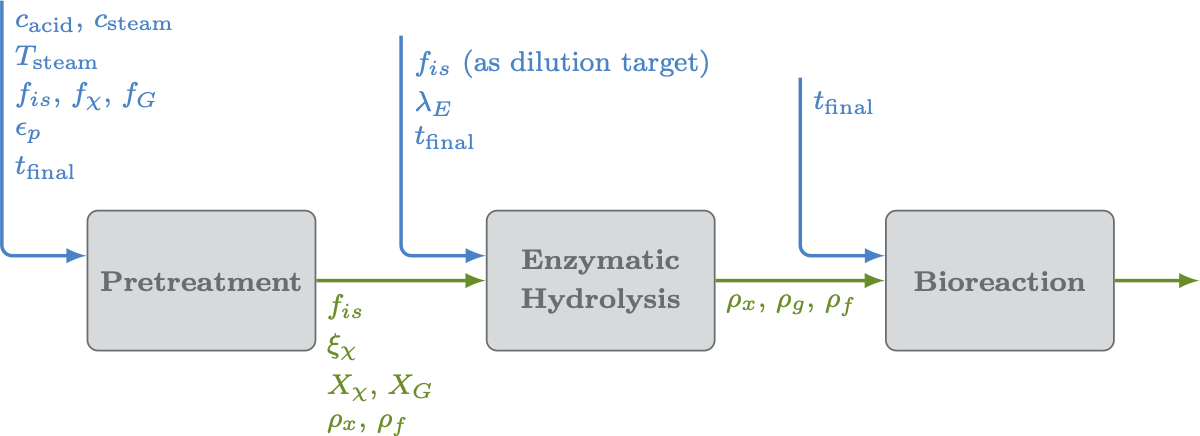

In [22]:
from ipywidgets import *

from virteng.WidgetFunctions import WidgetCollection
from virteng.Utilities import get_host_computer
from Models_classes import make_models_list

hpc_run = get_host_computer()   # See if we're running on HPC or on a laptop

from IPython.display import Image, HTML, clear_output
Image(os.path.join(os.path.dirname("__file__"), 'figures', 'three_unit_flow.png'), width=800)

---

## Set Virtual Engineering Options


### 0. Feedstock properties

Set the feedstock properties.


In [23]:
#================================================================
# Create the collection of widgets for feedstock options
fs_options = WidgetCollection()

fs_options.xylan_solid_fraction = widgets.BoundedFloatText(
    value = 0.263,
    max = 1,
    min = 0,
    description = r'Initial $X_X$',
    tooltip = 'The initial fraction of solids that is xylan (kg/kg).  Must be in the range [0, 1]'
)

fs_options.glucan_solid_fraction = widgets.BoundedFloatText(
    value = 0.40,
    max = 1,
    min = 0,
    description = r'Initial $X_G$',
    tooltip = 'The initial fraction of solids that is glucan (kg/kg).  Must be in the range [0, 1]'
)

fs_options.initial_porosity = widgets.BoundedFloatText(
    value = 0.8,
    max = 1,
    min = 0,
    description = r'Initial Porosity',
    tooltip = 'The initial porous fraction of the biomass particles.  Must be in the range [0, 1]'
)

#================================================================
# Display the widgets
fs_options.display_all_widgets()
#================================================================

---

### 1. Pretreatment Operation

Set the options for the pretreatment operation below.

In [24]:
#================================================================
# Create the collection of widgets for pretreatment options
pt_options = WidgetCollection()

#### this needs to be changed to g acid / g bone-dry biomass (then converted in the run function) ####
pt_options.initial_acid_conc = widgets.BoundedFloatText(
    value = 0.0001,
    max = 1.0,
    min = 0.0,
    description = 'Acid Loading',
    tooltip = 'The initial concentration of acid (mol/mL).  Must be in the range [0, 1]'
)

pt_options.steam_temperature = widgets.BoundedFloatText(
    value = 150.0,
    max = 250.3,
    min = 3.8,
    description = 'Steam Temperature',
    tooltip = r'The fixed temperature of the steam ($^\circ$C).',
)

pt_options.initial_solid_fraction = widgets.BoundedFloatText(
    value = 0.745,
    max = 1,
    min = 0,
    description = r'Initial FIS$_0$',
    tooltip = 'The initial fraction of insoluble solids (kg/kg).  Must be in the range [0, 1]'
)

pt_options.final_time = widgets.BoundedFloatText(
    value = 8.3,
    max = 1440,
    min = 1,
    description = 'Final Time',
    tooltip = r'Total simulation time (min).  Must be $\geq$ 1'
)

pt_options.show_plots = widgets.Checkbox(
    value = False,
    tooltip = 'Show Plots'
)

#================================================================
# Display the widgets
pt_options.display_all_widgets()
#================================================================

---

### 2. Enzymatic Hydrolysis Operation

Set the options for the enzymatic hydrolysis operation using either a two-phase reaction rate model or high-fidelity CFD below.


In [25]:
#================================================================
# Create the collection of widgets
eh_options = WidgetCollection()

eh_options.model_type = widgets.RadioButtons(
    options = ['Lignocellulose Model', 'CFD Surrogate', 'CFD Simulation'],
    value = 'CFD Surrogate',
    description = 'Model Type',
    disabled = False,
    tooltip = 'Specifies the solver to use for the EH step, "CFD Simulation" requires HPC resources.'
)

eh_options.lambda_e = widgets.BoundedFloatText(
    value = 30.0,
    max = 1000.0,
    min = 0.0,
    description = 'Enzymatic Load',
    tooltip = 'Ratio of the enzyme mass to the total solution mass (mg/g).  Must be in the range [0, 1000]'
)

eh_options.fis_0 = widgets.BoundedFloatText(
    value = 0.05,
    max = 1.0,
    min = 0.0,
    description = r'FIS$_0$ Target',
    tooltip = 'The target value for initial fraction of insoluble solids *after* dilution (kg/kg).  Must be in the range [0, 1]'
)

eh_options.t_final = widgets.BoundedFloatText(
    value = 24.0,
    min = 1.0,
    max = 24.0,
    description = 'Final Time',
    tooltip = r'The total time of the simulation (h).  Must be $\geq$ 1'
)

eh_options.show_plots = widgets.Checkbox(
    value = False,
    tooltip = 'Show Plots',
    disabled = True,
)

#================================================================
# Display the widgets
eh_options.display_all_widgets()
#================================================================

def model_type_action(change):
        
    if eh_options.model_type.value == 'Lignocellulose Model':
        # Lignocellulose Model
        eh_options.show_plots.value = False
        eh_options.show_plots.disabled = False
        eh_options.show_plots.description_tooltip = 'Show Plots'

    else:
        # Surrogate Model, CFD Simulation
        eh_options.show_plots.value = False
        eh_options.show_plots.disabled = True
        eh_options.show_plots.description_tooltip = 'Show Plots (Only available for lignocellulose model)'

eh_options.model_type.observe(model_type_action, names='value')

---

### 3. Bioreaction Operation

Set the options for the bubble column bioreaction operation below.


In [26]:
#================================================================
# Create the collection of widgets
br_options = WidgetCollection()

br_options.model_type = widgets.RadioButtons(
    options = ['CFD Surrogate', 'CFD Simulation'],
    value = 'CFD Surrogate',
    description = 'Model Type',
    disabled = False,
    tooltip = 'Specifies the solver to use for the bioreaction step, "CFD Simulation" requires HPC resources.'
)

br_options.gas_velocity = widgets.BoundedFloatText(
    value = 0.08, 
    min = 0.01,
    max = 0.1,
    description = 'Gas velocity',
    tooltip = r'Gas velocity in the simulation (m/s).  Must be in $[0.01, 0.1]$'
)

br_options.column_height = widgets.BoundedFloatText(
    value = 40., 
    min = 10.,
    max = 50.,
    description = 'Column height',
    tooltip = r'Column height (m).  Must be in $[10, 50]$'
)

br_options.column_diameter = widgets.BoundedFloatText(
    value = 5.0, 
    min = 1.,
    max = 6.,
    description = 'Column diameter',
    tooltip = r'Column diameter (m).  Must be in $[1, 6]$'
)

br_options.bubble_diameter = widgets.BoundedFloatText(
    value = 0.006,
    min = 0.003,
    max = 0.008,
    description = 'Bubble diameter',
    tooltip = r'Bubble diameter (m).  For surragate model must be in $[0.003, 0.008]$, for cfd must be $>=0$'
)

br_options.t_final = widgets.BoundedFloatText(
    value = 100.0, # default 500
    min = 1.0,
    max = 1e16,
    description = 'Final Time',
    tooltip = r'The total time of the simulation (h).  Must be $\geq 1$'
)

#================================================================
# Display the widgets
br_options.display_all_widgets()
#================================================================

---

## Run Model

When finished setting options for all unit operations, press the button below to run the complete model.


In [27]:
#================================================================
run_button = widgets.Button(
    description = 'Run All.',
    tooltip = 'Execute the model start-to-finish with the properties specified above.',
    layout =  {'width': '200px', 'margin': '25px 0px 100px 170px'}, 
    button_style = 'success'
)
#================================================================

# run_button_output = widgets.Output()
display(run_button)

#================================================================
# Define a function to be executed each time the run button is pressed
def run_button_action(b):
    clear_output()
    display(run_button)
    verbose = True
    # Initialize models
    models_list = make_models_list([fs_options, pt_options, eh_options, br_options], n_models=4, hpc_run=hpc_run)
    for model in models_list:
        model.run(verbose=verbose)
    
run_button.on_click(run_button_action)
#================================================================

Button(button_style='success', description='Run All.', layout=Layout(margin='25px 0px 100px 170px', width='200…

---

In [28]:
a = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" \
value="Toggle code visibility (hidden by default)."></form>''')

display(a)